# Naver Blog Crawler Using Selenium

참조 git hub : https://github.com/vg-rlo/Crawling/blob/main/naverblogCrawlerUsingSelenium.ipynb  
혼자서 https://blog.naver.com/pbh95/222385904614 따라하다가  
천재만재 성은님이 크롤링까지 clear 한 주피터 보고 따라해보겠다

In [3]:
! python --version

Python 3.7.9


In [1]:
import platform

print(platform.architecture())

('64bit', '')


참고 : https://docs.python.org/ko/3/library/platform.html  
기본값은 파이썬 인터프리터 바이너리  

In [5]:
pwd # print working directory

'/home/aiffel-dj35/aiffel/toy_project'

## Step 0. import module

In [6]:
import sys
import os
import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import tqdm
from tqdm.notebook import tqdm

In [7]:
!pwd

/home/aiffel-dj35/aiffel/toy_project


In [8]:
webdriver.__version__

'3.14.1'

In [9]:
blog_link = 'https://blog.naver.com/kin7605'

## Step 1. 크롬 웹브라우저 실행

크롬 버젼 확인  
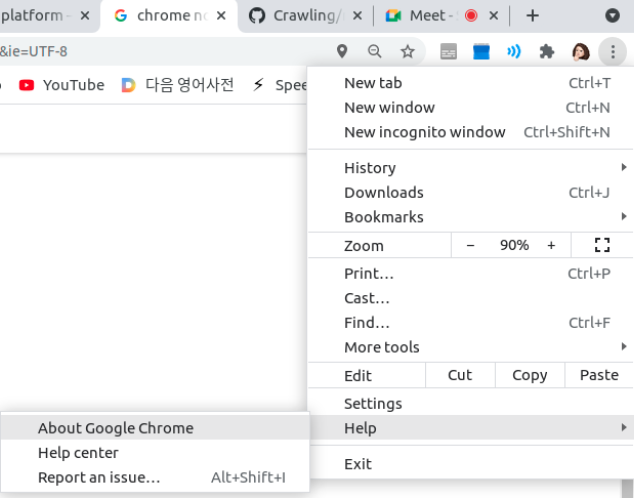  
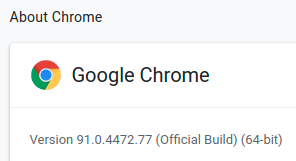  

버전에 맞게 chromedriver 다운로드 후에 아래 코드 실행  
https://chromedriver.chromium.org/downloads  

In [10]:
#Step 1. 크롬 웹브라우저 실행
path = os.getcwd() + '/chromedriver' # cwd = current working directory

driver = webdriver.Chrome(path)
driver.get(blog_link)

element = driver.find_element_by_id('mainFrame') # iframe 태그 엘리먼트 찾기
driver.switch_to.frame(element) # 프레임 이동
time.sleep(0.3)

In [11]:
# 목록 열기 버튼을 클릭해줘서 전체보기 목록을 펼쳐줘야함
driver.find_element_by_class_name("btn_openlist").click()
time.sleep(0.1)

목차에서 가장 최근 게시물의 xpath = //*[@id="listTopForm"]/table/tbody/tr[1]/td[1]/div/span/a

In [14]:
# 목차에서 가장 최근 게시물의 xpath
link = driver.find_element_by_xpath("//*[@id='listTopForm']/table/tbody/tr[1]/td[1]/div/span/a")
temp = link.get_attribute('href')
temp_ip = temp.split('&')[1].split('=')[-1]
address = blog_link + '/' + temp_ip

print('link :')
print(link)
print('-------')
print('temp :')
print(temp)
print('-------')
print('temp_ip :')
print(temp_ip)
print('-------')
print('address :')
print(address)

link :
<selenium.webdriver.remote.webelement.WebElement (session="b9348a120d89ae2bcb6ae19f57b06871", element="827b2750-a914-4ca5-bc9d-8fc8564b92aa")>
-------
temp :
https://blog.naver.com/PostView.nhn?blogId=kin7605&logNo=222389003168&categoryNo=0&parentCategoryNo=0&viewDate=&currentPage=1&postListTopCurrentPage=&from=
-------
temp_ip :
222389003168
-------
address :
https://blog.naver.com/kin7605/222389003168


In [15]:
url_set = [] # url 모음 

# 1 ~ 11 페이지네이션 접근 
for p in range(1, 12):
    # 마지막 페이지가 아닐 경우 
    if p != 11: 
        driver.find_element_by_xpath(f"//*[@id='toplistWrapper']/div[2]/div/a[{p}]").click()
        time.sleep(0.1) # 0.1초 기다리기
        
    # 마지막 페이지일 경우 & 해당 페이지에 1개의 페이지네이션만 있을 경우
    else:
        driver.find_element_by_xpath('//*[@id="toplistWrapper"]/div[2]/div/strong[2]').click()
    
    # 1 ~ 5개의 목록내 게시글 접근
    for i in range(1, 6):             
        # 해당 목록에서 i번째 글이 존재할 경우 url 가져오기
        try:
            link = driver.find_element_by_xpath(f"//*[@id='listTopForm']/table/tbody/tr[{i}]/td[1]/div/span/a")
            temp = link.get_attribute('href')
            temp_ip = temp.split('&')[1].split('=')[-1]
            address = blog_link + '/' + temp_ip
            url_set.append(address)
            
        # 해당 목록에서 i번째부터 글이 없는 경우 오류 발생하기 때문에 try except 구문 활용
        except: 
            print(f"목록에서 {i+1}번째 글이 없습니다.")

In [16]:
url_set

['https://blog.naver.com/kin7605/222389003168',
 'https://blog.naver.com/kin7605/222386946697',
 'https://blog.naver.com/kin7605/222386915734',
 'https://blog.naver.com/kin7605/222386030711',
 'https://blog.naver.com/kin7605/222383014299',
 'https://blog.naver.com/kin7605/222174279596',
 'https://blog.naver.com/kin7605/222157309723',
 'https://blog.naver.com/kin7605/222149069638',
 'https://blog.naver.com/kin7605/222148993925',
 'https://blog.naver.com/kin7605/222148120525',
 'https://blog.naver.com/kin7605/222139080344',
 'https://blog.naver.com/kin7605/222112066715',
 'https://blog.naver.com/kin7605/222056002472',
 'https://blog.naver.com/kin7605/222055990339',
 'https://blog.naver.com/kin7605/221989992907',
 'https://blog.naver.com/kin7605/221954401556',
 'https://blog.naver.com/kin7605/221864430309',
 'https://blog.naver.com/kin7605/221858493295',
 'https://blog.naver.com/kin7605/221858459409',
 'https://blog.naver.com/kin7605/221854633311',
 'https://blog.naver.com/kin7605/2218474

In [17]:
# 총 게시글 55개
print(len(url_set))

55


In [18]:
## Step 2. 게시물 제목, 내용, 공감 수 크롤링하기

In [ ]:
res_df = co.deque([])
for i in range(len(url_set)):
    dirver.get(url_set[i])
    element = driver.find_element_by_id("mainFrame") # iframe 태그 엘리먼트 찾기
    driver.swich_to.frame(element) # 프레임 이동
    
    # 게시글 제목 xpath
    title = driver.find_elements_by_xpath('//*[@id="SE-08a4df5b-5931-4ff9-9c01-e62ed3ca1dbf"]/div/div/div[2]/div')